In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set(style='darkgrid')

In [224]:
train_df=pd.read_csv('train (1).csv')
test_df=pd.read_csv('test (1).csv')

In [225]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [226]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [227]:
print('Trainsing Data shape',train_df.shape)
print('Test Data shape',test_df.shape)

Trainsing Data shape (8693, 14)
Test Data shape (4277, 13)


In [228]:
print('Checking_duplicates_in trainig data',train_df.duplicated().sum())
print('Checking_duplicates_in testing data',test_df.duplicated().sum())

Checking_duplicates_in trainig data 0
Checking_duplicates_in testing data 0


In [229]:
print('cheking the data type of training data')
train_df.info()
print('\n','-'*100)
print('cheking the data type of testing data')
test_df.info()
print('\n','-'*100)

cheking the data type of training data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

 ----------------------------------------------------------------------------------------------------


In [230]:
round(100*train_df.isnull().sum()[train_df.isnull().sum()>0]/train_df.shape[0],2)

HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
dtype: float64

In [231]:
df1=train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:'number of missing values'})
df1['% of missing values']=round(100*train_df.isnull().sum()[train_df.isnull().sum()>0]/train_df.shape[0],2)
df1

,number of missing values,% of missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [232]:
df2=test_df.isnull().sum()[test_df.isnull().sum()>0].to_frame().rename(columns={0:'number of missing values'})
df2['% of missing values']=round(100*test_df.isnull().sum()[test_df.isnull().sum()>0]/test_df.shape[0],2)
df2

,number of missing values,% of missing values
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


In [233]:
print('training Data', train_df.select_dtypes(include='object').nunique())

print('-'*100)

print('training Data', train_df.select_dtypes(include='object').nunique())

training Data PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64
----------------------------------------------------------------------------------------------------
training Data PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64


In [234]:
train_df['Transported'].unique()

array([False,  True])

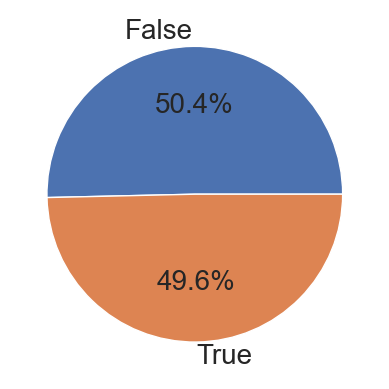

In [235]:
plt.pie(train_df['Transported'].value_counts(),labels=train_df['Transported'].unique(),autopct='%0.1f%%',
        textprops={'fontsize':20});

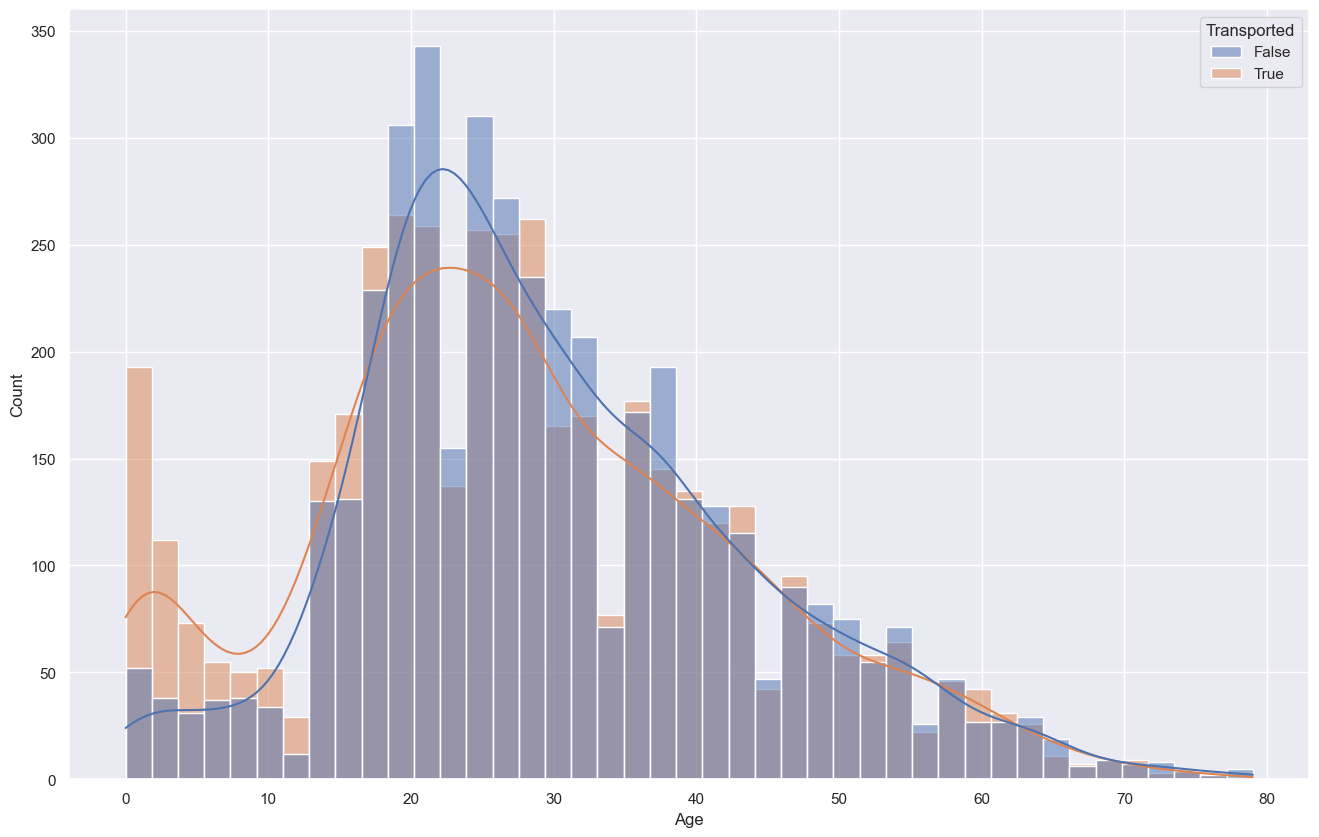

In [236]:
plt.figure(figsize=(16,10))
sns.histplot(x=train_df['Age'],hue='Transported',kde=True,data=train_df);

# Feature_Engineering

In [237]:
train_df['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [238]:
train_df['PassengerId'].apply(lambda a:a.split('_')[0])

0       0001
1       0002
2       0003
3       0003
4       0004
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: PassengerId, Length: 8693, dtype: object

In [239]:
z=train_df['PassengerId'].apply(lambda a:a.split('_')[1])
z

0       01
1       01
2       01
3       02
4       01
        ..
8688    01
8689    01
8690    01
8691    01
8692    02
Name: PassengerId, Length: 8693, dtype: object

In [240]:
def passenger_new_feature(df):
    df['Group']=df['PassengerId'].apply(lambda a:a.split('_')[0])
    
    df['Member']=df['PassengerId'].apply(lambda a:a.split('_')[1])
    
    x=df.groupby(['Group'])['Member'].count().sort_values()

    y=set(x[x>1].index)
    
    
    df['Travelling_solo']=df['Group'].apply(lambda a: a not in y)
    
    df['Group_size']=0

    
    for i in x.items():
        df.loc[df['Group']==i[0],'Group_size']=i[1]


    
    
    
    

In [241]:
passenger_new_feature(train_df)

In [242]:
passenger_new_feature(test_df)

In [243]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_solo,Group_size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,True,1


In [244]:
train_df.drop(columns=['Group','Member'],inplace=True)
test_df.drop(columns=['Group','Member'],inplace=True)

In [245]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_solo,Group_size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1


In [247]:
def Cabin_new_feature(df):


    df['Cabin'].fillna("np.nan/np.nan/np.nan",inplace=True)


    df['Cabin_Deck']=df['Cabin'].apply(lambda z: z.split("/")[0])
    df['Cabin_Number']=df['Cabin'].apply(lambda z: z.split("/")[1])
    df['Cabin_Side']=df['Cabin'].apply(lambda z: z.split("/")[2])



    col=['Cabin_Deck','Cabin_Number','Cabin_Side']

    df[col]=df[col].replace("np.nan",np.nan)

    df['Cabin_Deck'].fillna(df['Cabin_Deck'].mode()[0],inplace=True)
    df['Cabin_Side'].fillna(df['Cabin_Side'].mode()[0],inplace=True)
    df['Cabin_Number']=df['Cabin_Number'].astype(float)

    df['Cabin_Number'].fillna(df['Cabin_Number'].median(),inplace=True)



In [248]:
Cabin_new_feature(train_df)


In [249]:
Cabin_new_feature(test_df)

In [250]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Travelling_solo,Group_size,Cabin_Deck,Cabin_Number,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True,1,G,3.0,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,True,1,F,4.0,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True,1,C,0.0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True,1,C,1.0,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True,1,F,5.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,False,2,G,1496.0,S
4273,9269_01,Earth,False,np.nan/np.nan/np.nan,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,True,1,F,442.0,S
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,True,1,D,296.0,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,True,1,D,297.0,P


In [251]:
train_df['Cabin_Number'].value_counts()

427.0     204
82.0       28
86.0       22
19.0       22
56.0       21
         ... 
1644.0      1
1515.0      1
1639.0      1
1277.0      1
1894.0      1
Name: Cabin_Number, Length: 1817, dtype: int64

In [252]:
def Cabin_Region(df):

    df['Cabin_Region1']=(df['Cabin_Number']<300)
    df['Cabin_Region2']=(df['Cabin_Number']>=300) & (df['Cabin_Number']<600)
    df['Cabin_Region3']=(df['Cabin_Number']>=600) & (df['Cabin_Number']<900)
    df['Cabin_Region4']=(df['Cabin_Number']>=900) & (df['Cabin_Number']<1200)
    df['Cabin_Region5']=(df['Cabin_Number']>=1200) & (df['Cabin_Number']<1500)
    df['Cabin_Region6']=(df['Cabin_Number']>=1500) 

In [253]:
Cabin_Region(train_df)

In [254]:
Cabin_Region(test_df)

In [255]:
train_df.drop(columns=['Cabin_Number'],inplace=True)
test_df.drop(columns=['Cabin_Number'],inplace=True)

In [256]:
set(sorted(train_df['Age'].unique()))

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 nan,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0}

In [261]:
def age_group(df):
    age_group1=[]
    for i in df['Age']:
        
        if i<=15:
            age_group1.append('Age_0-15')
        elif i>15 and i<=30:
            age_group1.append('Age_0-30')
            
            
        elif i>30 and i<=45:
            age_group1.append('Age_0-45')

            
            
        elif i>45 and i<=60:
            age_group1.append('Age_0-60')
            
        elif i>60:
            age_group1.append('Age_0-60+')
            
            
        else:
            age_group1.append(np.nan)
            
                
    df['Age Group']=age_group1
#         print(len(age_group1))

#     print(age_group1)
            
        
            
            
            
        
            

In [262]:
age_group(train_df)

In [264]:
age_group(test_df)

In [265]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Group_size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,1,G,S,True,False,False,False,False,False,Age_0-30
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,1,F,S,True,False,False,False,False,False,Age_0-30
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,1,C,S,True,False,False,False,False,False,Age_0-45
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,1,C,S,True,False,False,False,False,False,Age_0-45
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,1,F,S,True,False,False,False,False,False,Age_0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,2,G,S,False,False,False,False,True,False,Age_0-45
4273,9269_01,Earth,False,np.nan/np.nan/np.nan,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,1,F,S,False,True,False,False,False,False,Age_0-45
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,1,D,P,True,False,False,False,False,False,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,1,D,P,True,False,False,False,False,False,NaN


In [275]:
pd.set_option('display.max_columns',None)

In [276]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_0-45
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_0-30
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,Age_0-60
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,S,True,False,False,False,False,False,Age_0-45
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,S,True,False,False,False,False,False,Age_0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,True,1,A,P,True,False,False,False,False,False,Age_0-45
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True,1,G,S,False,False,False,False,True,False,Age_0-30
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True,1,G,S,False,False,False,False,False,True,Age_0-30
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False,2,E,S,False,False,True,False,False,False,Age_0-45


In [278]:
exp_cols=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']




In [283]:
def new_exp_feature(df):
    df['Total Expenditure']=df[exp_cols].sum(axis=1)
    df['No Spending']=(df['Total Expenditure']==0)

In [285]:
new_exp_feature(train_df)

In [286]:
new_exp_feature(test_df)

In [287]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_0-45,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_0-30,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,Age_0-60,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,S,True,False,False,False,False,False,Age_0-45,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,S,True,False,False,False,False,False,Age_0-30,1091.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,True,1,A,P,True,False,False,False,False,False,Age_0-45,8536.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True,1,G,S,False,False,False,False,True,False,Age_0-30,0.0,True
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True,1,G,S,False,False,False,False,False,True,Age_0-30,1873.0,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False,2,E,S,False,False,True,False,False,False,Age_0-45,4637.0,False


In [307]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_0-45,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_0-30,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,Age_0-60,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,S,True,False,False,False,False,False,Age_0-45,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,S,True,False,False,False,False,False,Age_0-30,1091.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,True,1,A,P,True,False,False,False,False,False,Age_0-45,8536.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True,1,G,S,False,False,False,False,True,False,Age_0-30,0.0,True
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True,1,G,S,False,False,False,False,False,True,Age_0-30,1873.0,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False,2,E,S,False,False,True,False,False,False,Age_0-45,4637.0,False


In [309]:
train_df['Total Expenditure'].mean()

1440.8663292304152

In [310]:
train_df['Total Expenditure'].median()

716.0

In [311]:
def expenditure_category(df):
    expense_category=[]
    
    for i in df['Total Expenditure']:
        if i==0:
            expense_category.append('No Expense')
        elif i>0 and i<=df['Total Expenditure'].median():
            expense_category.append('Low Expense')
        elif i>df['Total Expenditure'].median()  and i<=df['Total Expenditure'].mean():
            expense_category.append('Medium Expense')
            
        else:
            expense_category.append('High Expense')
            
            
    df['Expenditure Category']=expense_category

            
            
        

            

In [312]:
expenditure_category(train_df)

In [313]:
expenditure_category(test_df)

In [314]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_0-45,0.0,True,No Expense
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_0-30,736.0,False,Medium Expense
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,Age_0-60,10383.0,False,High Expense
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,S,True,False,False,False,False,False,Age_0-45,5176.0,False,High Expense
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,S,True,False,False,False,False,False,Age_0-30,1091.0,False,Medium Expense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,True,1,A,P,True,False,False,False,False,False,Age_0-45,8536.0,False,High Expense
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True,1,G,S,False,False,False,False,True,False,Age_0-30,0.0,True,No Expense
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True,1,G,S,False,False,False,False,False,True,Age_0-30,1873.0,False,High Expense
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False,2,E,S,False,False,True,False,False,False,Age_0-45,4637.0,False,High Expense


In [315]:
df1=train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:'number of missing values'})
df1['% of missing values']=round(100*train_df.isnull().sum()[train_df.isnull().sum()>0]/train_df.shape[0],2)
df1

,number of missing values,% of missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


In [316]:
import missingno as msno

In [318]:
train_df.shape[0]

8693

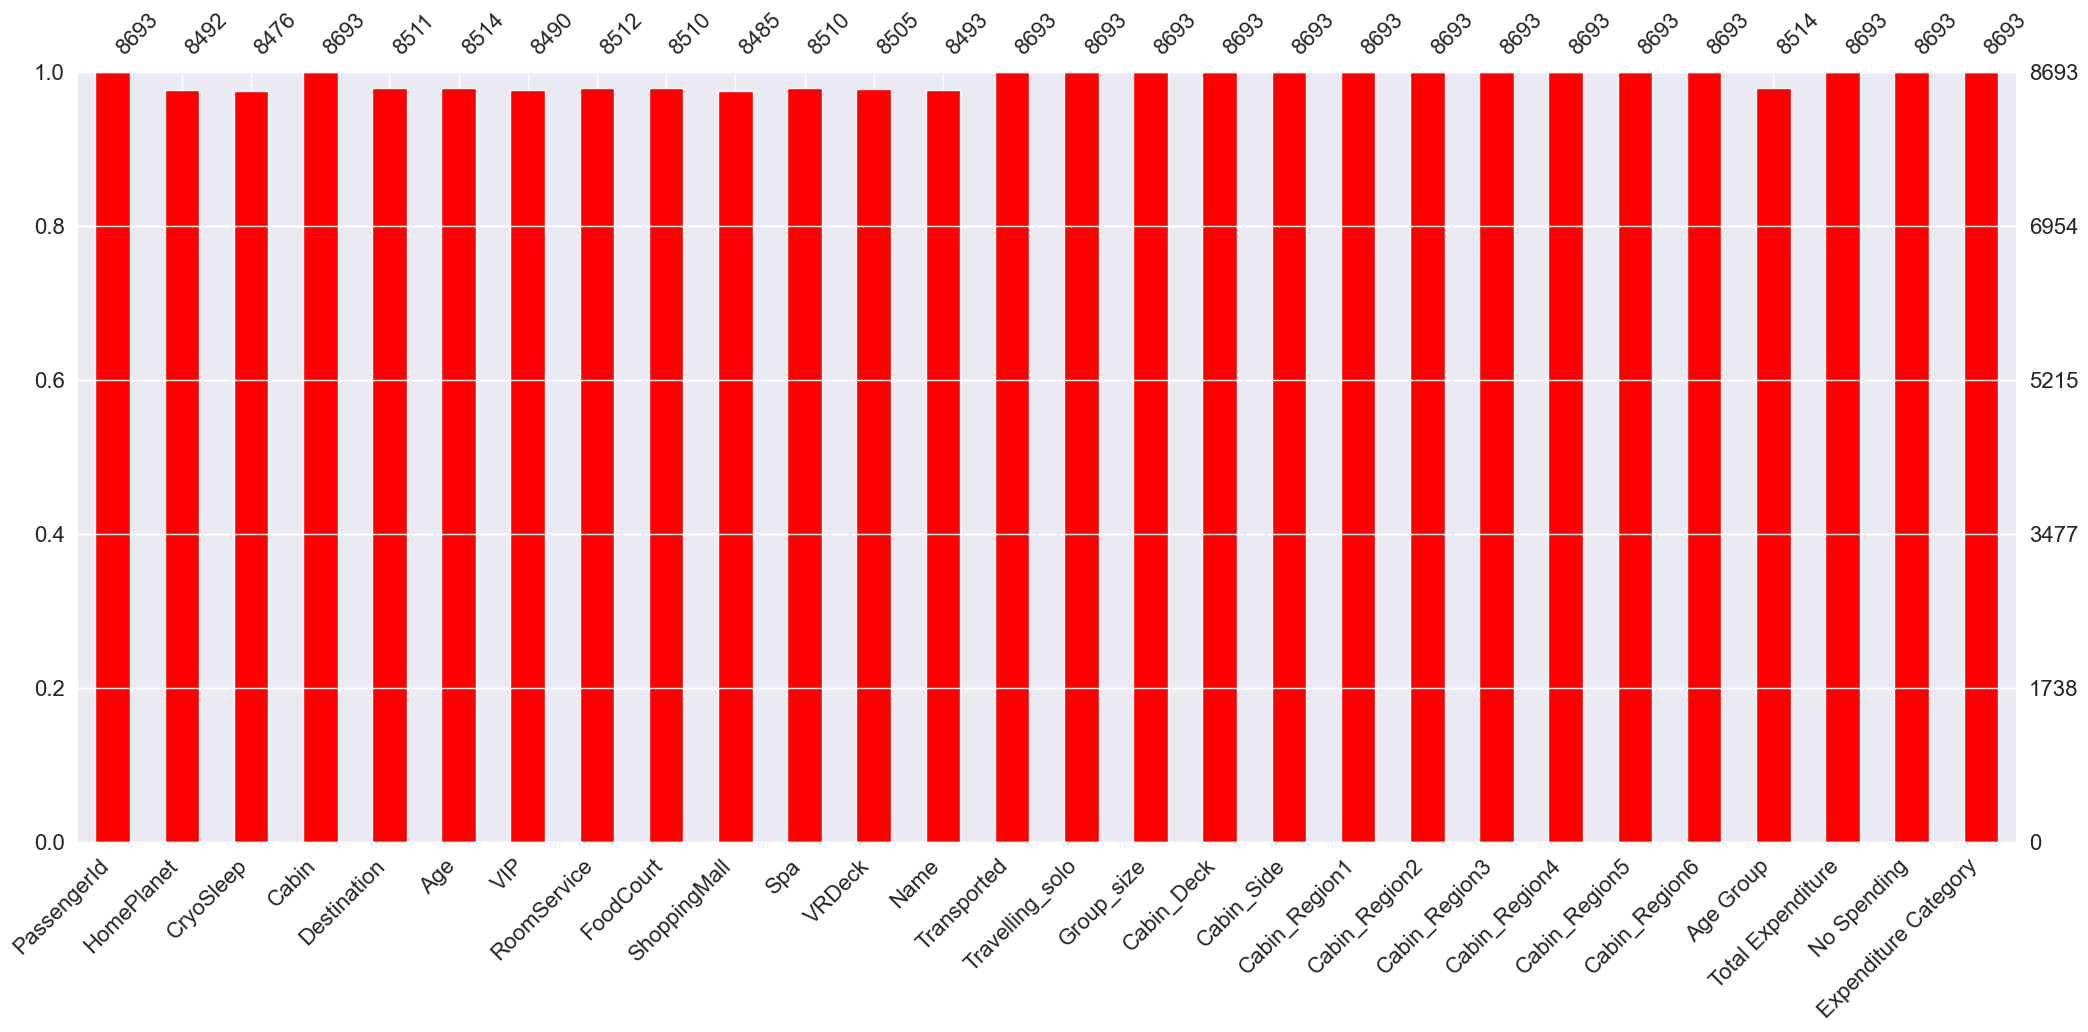

In [319]:
msno.bar(train_df,color='red');

In [323]:
cat_cols=train_df.select_dtypes(include=['object','bool']).columns.tolist()
cat_cols

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Transported',
 'Travelling_solo',
 'Cabin_Deck',
 'Cabin_Side',
 'Cabin_Region1',
 'Cabin_Region2',
 'Cabin_Region3',
 'Cabin_Region4',
 'Cabin_Region5',
 'Cabin_Region6',
 'Age Group',
 'No Spending',
 'Expenditure Category']

In [325]:
cat_cols.remove('Transported')

In [326]:
num_cols=train_df.select_dtypes(include=['int','float']).columns.tolist()
num_cols

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Group_size',
 'Total Expenditure']

In [327]:
from sklearn.impute import SimpleImputer

In [328]:
imputer1=SimpleImputer(strategy='most_frequent')
imputer2=SimpleImputer(strategy='median')


In [329]:
def fill_missing(df):
    df[cat_cols]=imputer1.fit_transform(df[cat_cols])
    df[num_cols]=imputer2.fit_transform(df[num_cols])

In [330]:
fill_missing(train_df)

In [331]:
fill_missing(test_df)

In [333]:
train_df.isnull().sum().sum()

0

In [334]:
test_df.isnull().sum().sum()

0

In [335]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1.0,B,P,True,False,False,False,False,False,Age_0-45,0.0,True,No Expense
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1.0,F,S,True,False,False,False,False,False,Age_0-30,736.0,False,Medium Expense
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2.0,A,S,True,False,False,False,False,False,Age_0-60,10383.0,False,High Expense
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2.0,A,S,True,False,False,False,False,False,Age_0-45,5176.0,False,High Expense
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1.0,F,S,True,False,False,False,False,False,Age_0-30,1091.0,False,Medium Expense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,True,1.0,A,P,True,False,False,False,False,False,Age_0-45,8536.0,False,High Expense
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,True,1.0,G,S,False,False,False,False,True,False,Age_0-30,0.0,True,No Expense
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,True,1.0,G,S,False,False,False,False,False,True,Age_0-30,1873.0,False,High Expense
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,False,2.0,E,S,False,False,True,False,False,False,Age_0-45,4637.0,False,High Expense


In [344]:
col=['PassengerId','Cabin','Name']

train_df.drop(columns=col,inplace=True)

In [346]:
test_df.drop(columns=['Cabin','Name'],inplace=True)

In [347]:
pass_df=test_df[['PassengerId']]
pass_df

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [348]:
train_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Travelling_solo', 'Group_size', 'Cabin_Deck', 'Cabin_Side',
       'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4',
       'Cabin_Region5', 'Cabin_Region6', 'Age Group', 'Total Expenditure',
       'No Spending', 'Expenditure Category'],
      dtype='object')

In [350]:
cols=['RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Total Expenditure']

for value in cols:
    train_df[value]=np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])

In [361]:
col=['CryoSleep','VIP','Travelling_solo','Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4',
       'Cabin_Region5', 'Cabin_Region6','No Spending']

In [364]:
train_df[col]=train_df[col].astype(bool)

In [365]:
test_df[col]=test_df[col].astype(bool)

In [366]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8693 non-null   object 
 1   CryoSleep             8693 non-null   bool   
 2   Destination           8693 non-null   object 
 3   Age                   8693 non-null   float64
 4   VIP                   8693 non-null   bool   
 5   RoomService           8693 non-null   float64
 6   FoodCourt             8693 non-null   float64
 7   ShoppingMall          8693 non-null   float64
 8   Spa                   8693 non-null   float64
 9   VRDeck                8693 non-null   float64
 10  Transported           8693 non-null   bool   
 11  Travelling_solo       8693 non-null   bool   
 12  Group_size            8693 non-null   float64
 13  Cabin_Deck            8693 non-null   object 
 14  Cabin_Side            8693 non-null   object 
 15  Cabin_Region1        

In [367]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category
0,Europa,False,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,1.0,B,P,True,False,False,False,False,False,Age_0-45,0.000000,True,No Expense
1,Earth,False,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,True,True,1.0,F,S,True,False,False,False,False,False,Age_0-30,6.602588,False,Medium Expense
2,Europa,False,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,False,False,2.0,A,S,True,False,False,False,False,False,Age_0-60,9.248021,False,High Expense
3,Europa,False,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,False,False,2.0,A,S,True,False,False,False,False,False,Age_0-45,8.551981,False,High Expense
4,Earth,False,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,True,True,1.0,F,S,True,False,False,False,False,False,Age_0-30,6.995766,False,Medium Expense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.000000,8.827615,0.000000,7.404888,4.317488,False,True,1.0,A,P,True,False,False,False,False,False,Age_0-45,9.052165,False,High Expense
8689,Earth,True,PSO J318.5-22,18.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,1.0,G,S,False,False,False,False,True,False,Age_0-30,0.000000,True,No Expense
8690,Earth,False,TRAPPIST-1e,26.0,False,0.000000,0.000000,7.535297,0.693147,0.000000,True,True,1.0,G,S,False,False,False,False,False,True,Age_0-30,7.535830,False,High Expense
8691,Europa,False,55 Cancri e,32.0,False,0.000000,6.956545,0.000000,5.869297,8.082093,False,False,2.0,E,S,False,False,True,False,False,False,Age_0-45,8.442039,False,High Expense


In [377]:
nominal_cat=['HomePlanet','Destination']
ordinal_cat=['CryoSleep','VIP','Travelling_solo','Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4',
       'Cabin_Region5', 'Cabin_Region6','No Spending','Expenditure Category','Cabin_Deck','Cabin_Side','Age Group']

In [396]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [380]:
enc=LabelEncoder()


In [382]:
train_df[ordinal_cat]=train_df[ordinal_cat].apply(enc.fit_transform)

In [384]:
test_df[ordinal_cat]=test_df[ordinal_cat].apply(enc.fit_transform)

In [386]:
train_df=pd.get_dummies(train_df,columns=nominal_cat)
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,1,1.0,1,0,1,0,0,0,0,0,2,0.000000,1,3,0,1,0,0,0,1
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,True,1,1.0,5,1,1,0,0,0,0,0,1,6.602588,0,2,1,0,0,0,0,1
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,False,0,2.0,0,1,1,0,0,0,0,0,3,9.248021,0,0,0,1,0,0,0,1
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,False,0,2.0,0,1,1,0,0,0,0,0,2,8.551981,0,0,0,1,0,0,0,1
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,True,1,1.0,5,1,1,0,0,0,0,0,1,6.995766,0,2,1,0,0,0,0,1


In [387]:
test_df=pd.get_dummies(test_df,columns=nominal_cat)


In [393]:
train_df['Transported']=train_df['Transported'].map({True:1,False:0})

In [394]:
train_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_solo,Group_size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1.0,1,0,1,0,0,0,0,0,2,0.000000,1,3,0,1,0,0,0,1
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,1,1.0,5,1,1,0,0,0,0,0,1,6.602588,0,2,1,0,0,0,0,1
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,0,2.0,0,1,1,0,0,0,0,0,3,9.248021,0,0,0,1,0,0,0,1
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,0,2.0,0,1,1,0,0,0,0,0,2,8.551981,0,0,0,1,0,0,0,1
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,1.0,5,1,1,0,0,0,0,0,1,6.995766,0,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.000000,8.827615,0.000000,7.404888,4.317488,0,1,1.0,0,0,1,0,0,0,0,0,2,9.052165,0,0,0,1,0,1,0,0
8689,1,18.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1.0,6,1,0,0,0,0,1,0,1,0.000000,1,3,1,0,0,0,1,0
8690,0,26.0,0,0.000000,0.000000,7.535297,0.693147,0.000000,1,1,1.0,6,1,0,0,0,0,0,1,1,7.535830,0,0,1,0,0,0,0,1
8691,0,32.0,0,0.000000,6.956545,0.000000,5.869297,8.082093,0,0,2.0,4,1,0,0,1,0,0,0,2,8.442039,0,0,0,1,0,1,0,0


In [395]:
X=train_df.drop(columns=['Transported'])
y=train_df['Transported']

In [400]:
scaler=StandardScaler()

In [401]:
X_scaled=scaler.fit_transform(X)
test_df_scaled=scaler.fit_transform(test_df)

In [402]:
from sklearn.model_selection import train_test_split

In [403]:
x_train,x_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [406]:
x_train1,x_test1,y_train1, y_test1=train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [404]:
print(x_train.shape,y_train.shape)

(6954, 28) (6954,)


In [405]:
print(x_test.shape,y_test.shape)

(1739, 28) (1739,)


In [454]:
training_score=[]
testing_score=[]

In [455]:

def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1=model.predict(x_train1)
    x_test_pred1=model.predict(x_test1)
    a=accuracy_score(y_train1,x_train_pred1)*100
    b=accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)

    
    print(f'Accuracy of{model} model on training data',a)
    print(f'Accuracy of{model} model on testing data',b)
    
    print()
    print('-'*100)
    
    print(f'precision score of {model} is',precision_score(y_test1,x_test_pred1))

    print(f'Recall score of {model} is',recall_score(y_test1,x_test_pred1))
    
    print(f'f1 score of {model} is',f1_score(y_test1,x_test_pred1))

    
    print()
    
    print('-'*100)
    print(f'confusion matrix of {model} model is')
    cm=confusion_matrix(y_test1,x_test_pred1)
    
    plt.figure(figsize=(9,4))
    sns.heatmap(cm,annot=True,fmt='g',cmap='summer')
    plt.show()
    
    

    
    

In [456]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

Accuracy ofLogisticRegression() model on training data 77.9838941616336
Accuracy ofLogisticRegression() model on testing data 77.17078780908568

----------------------------------------------------------------------------------------------------
precision score of LogisticRegression() is 0.7583603020496225
Recall score of LogisticRegression() is 0.8025114155251142
f1 score of LogisticRegression() is 0.7798114254021076

----------------------------------------------------------------------------------------------------
confusion matrix of LogisticRegression() model is


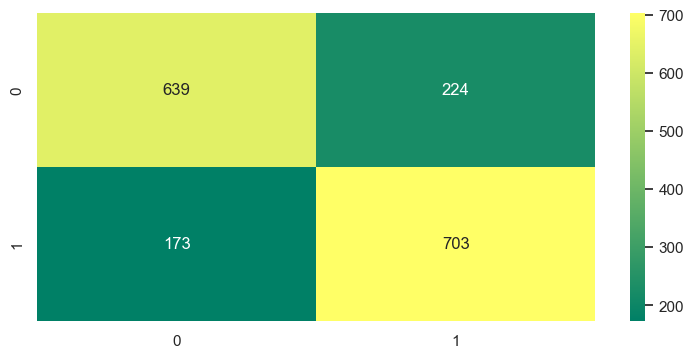

In [457]:
model_prediction(LogisticRegression())

Accuracy ofKNeighborsClassifier() model on training data 83.29019269485188
Accuracy ofKNeighborsClassifier() model on testing data 75.27314548591144

----------------------------------------------------------------------------------------------------
precision score of KNeighborsClassifier() is 0.7706310679611651
Recall score of KNeighborsClassifier() is 0.7248858447488584
f1 score of KNeighborsClassifier() is 0.7470588235294118

----------------------------------------------------------------------------------------------------
confusion matrix of KNeighborsClassifier() model is


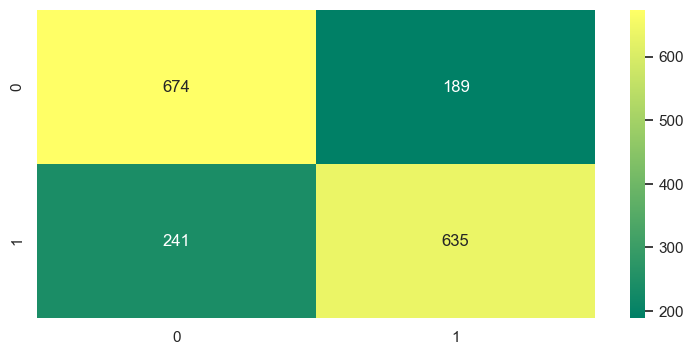

In [458]:
model_prediction(KNeighborsClassifier())

Accuracy ofGaussianNB() model on training data 73.94305435720449
Accuracy ofGaussianNB() model on testing data 73.43300747556066

----------------------------------------------------------------------------------------------------
precision score of GaussianNB() is 0.7782258064516129
Recall score of GaussianNB() is 0.660958904109589
f1 score of GaussianNB() is 0.7148148148148147

----------------------------------------------------------------------------------------------------
confusion matrix of GaussianNB() model is


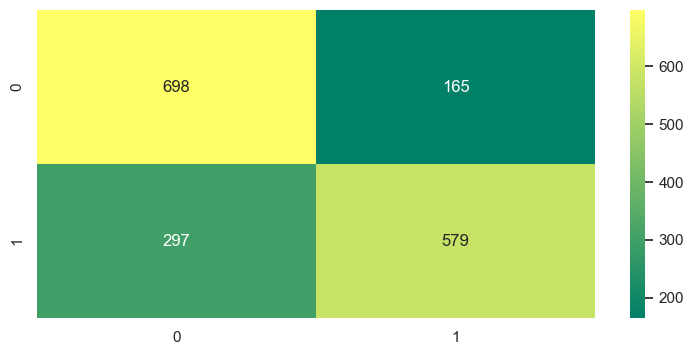

In [459]:
model_prediction(GaussianNB())

Accuracy ofSVC() model on training data 81.78027034800115
Accuracy ofSVC() model on testing data 79.35595169637722

----------------------------------------------------------------------------------------------------
precision score of SVC() is 0.7967853042479908
Recall score of SVC() is 0.7922374429223744
f1 score of SVC() is 0.7945048654836864

----------------------------------------------------------------------------------------------------
confusion matrix of SVC() model is


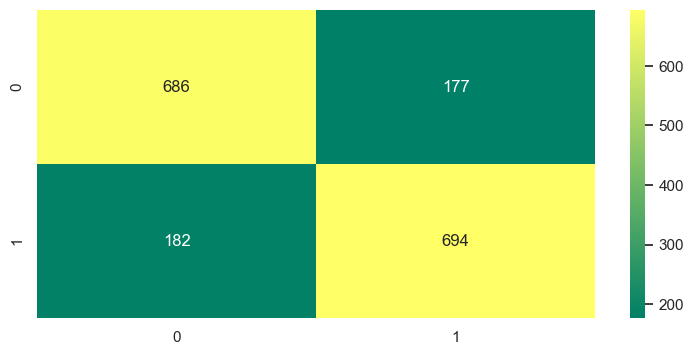

In [460]:
model_prediction(SVC())

In [461]:

def model_prediction1(model):
    model.fit(x_train,y_train)
    x_train_pred=model.predict(x_train)
    x_test_pred=model.predict(x_test)
    a=accuracy_score(y_train,x_train_pred)*100
    b=accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f'Accuracy of{model} model on training data',a)
    print(f'Accuracy of{model} model on testing data',b)
    
    print()
    print('-'*100)
    
    print(f'precision score of {model} is',precision_score(y_test,x_test_pred))

    print(f'Recall score of {model} is',recall_score(y_test,x_test_pred))
    
    print(f'f1 score of {model} is',f1_score(y_test,x_test_pred))

    
    print()
    
    print('-'*100)
    print(f'confusion matrix of {model} model is')
    cm=confusion_matrix(y_test,x_test_pred)
    
    plt.figure(figsize=(9,4))
    sns.heatmap(cm,annot=True,fmt='g',cmap='summer')
    plt.show()
    
    

    
    

Accuracy ofDecisionTreeClassifier() model on training data 98.47569744032212
Accuracy ofDecisionTreeClassifier() model on testing data 74.23806785508913

----------------------------------------------------------------------------------------------------
precision score of DecisionTreeClassifier() is 0.7465437788018433
Recall score of DecisionTreeClassifier() is 0.7397260273972602
f1 score of DecisionTreeClassifier() is 0.7431192660550459

----------------------------------------------------------------------------------------------------
confusion matrix of DecisionTreeClassifier() model is


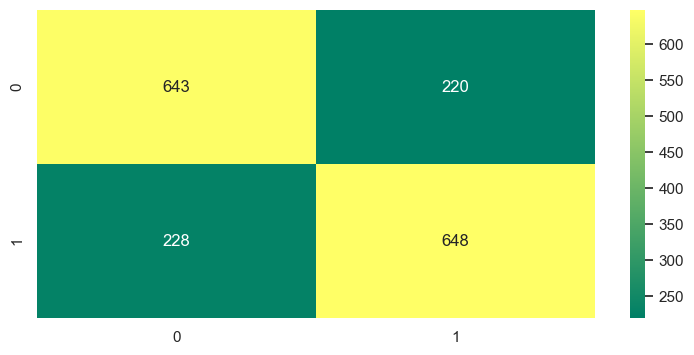

In [462]:
model_prediction1(DecisionTreeClassifier())

Accuracy ofRandomForestClassifier() model on training data 98.47569744032212
Accuracy ofRandomForestClassifier() model on testing data 80.67855089131685

----------------------------------------------------------------------------------------------------
precision score of RandomForestClassifier() is 0.8366583541147132
Recall score of RandomForestClassifier() is 0.7659817351598174
f1 score of RandomForestClassifier() is 0.7997616209773541

----------------------------------------------------------------------------------------------------
confusion matrix of RandomForestClassifier() model is


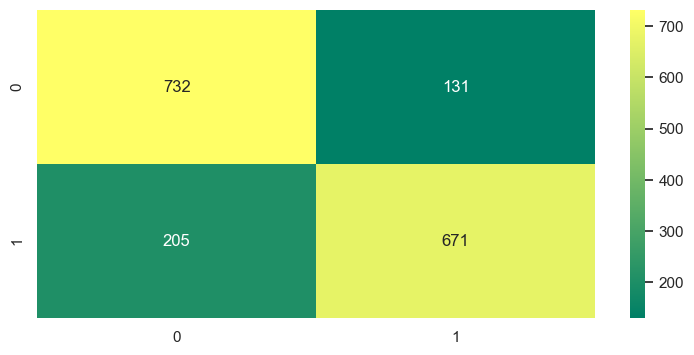

In [463]:
model_prediction1(RandomForestClassifier())

Accuracy ofAdaBoostClassifier() model on training data 79.98274374460742
Accuracy ofAdaBoostClassifier() model on testing data 79.24094307073031

----------------------------------------------------------------------------------------------------
precision score of AdaBoostClassifier() is 0.7657378740970072
Recall score of AdaBoostClassifier() is 0.8470319634703196
f1 score of AdaBoostClassifier() is 0.8043360433604336

----------------------------------------------------------------------------------------------------
confusion matrix of AdaBoostClassifier() model is


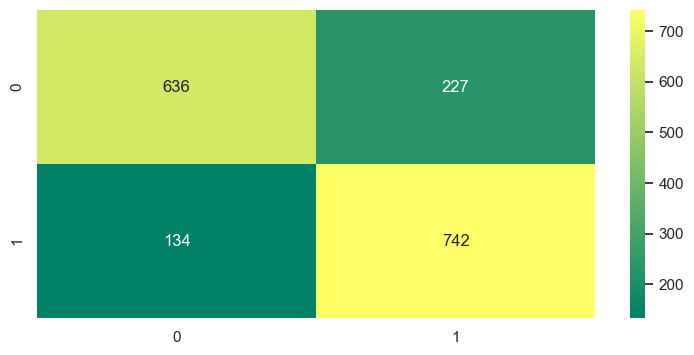

In [464]:
model_prediction1(AdaBoostClassifier())

Accuracy ofGradientBoostingClassifier() model on training data 81.90969226344549
Accuracy ofGradientBoostingClassifier() model on testing data 79.35595169637722

----------------------------------------------------------------------------------------------------
precision score of GradientBoostingClassifier() is 0.7747077577045696
Recall score of GradientBoostingClassifier() is 0.8321917808219178
f1 score of GradientBoostingClassifier() is 0.8024215740231151

----------------------------------------------------------------------------------------------------
confusion matrix of GradientBoostingClassifier() model is


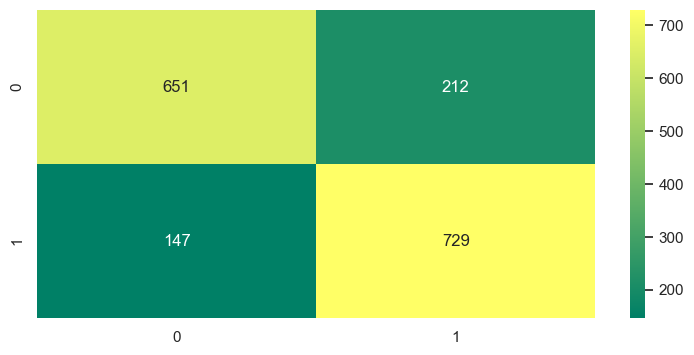

In [465]:
model_prediction1(GradientBoostingClassifier())

Accuracy ofLGBMClassifier() model on training data 88.48144952545299
Accuracy ofLGBMClassifier() model on testing data 81.31109833237493

----------------------------------------------------------------------------------------------------
precision score of LGBMClassifier() is 0.8057713651498335
Recall score of LGBMClassifier() is 0.8287671232876712
f1 score of LGBMClassifier() is 0.8171074845244795

----------------------------------------------------------------------------------------------------
confusion matrix of LGBMClassifier() model is


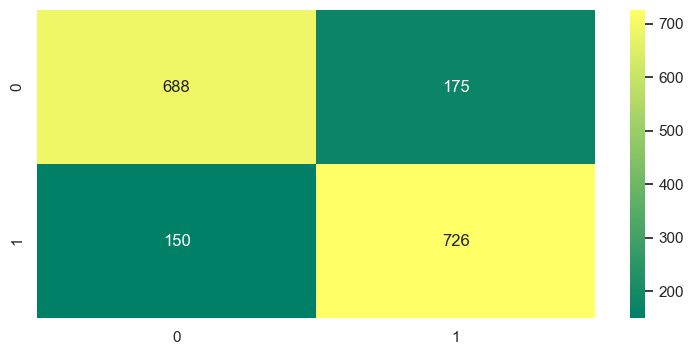

In [466]:
model_prediction1(LGBMClassifier())

Accuracy ofXGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on training data 92.72361230946218
Accuracy ofXGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None

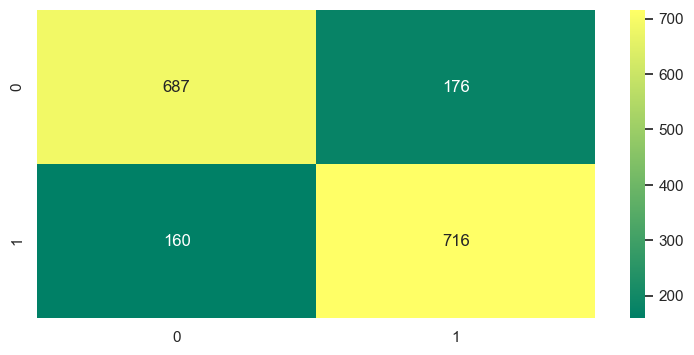

In [467]:
model_prediction1(XGBClassifier())

Accuracy of<catboost.core.CatBoostClassifier object at 0x0000020B30CA9210> model on training data 87.37417313776244
Accuracy of<catboost.core.CatBoostClassifier object at 0x0000020B30CA9210> model on testing data 81.31109833237493

----------------------------------------------------------------------------------------------------
precision score of <catboost.core.CatBoostClassifier object at 0x0000020B30CA9210> is 0.8010928961748633
Recall score of <catboost.core.CatBoostClassifier object at 0x0000020B30CA9210> is 0.83675799086758
f1 score of <catboost.core.CatBoostClassifier object at 0x0000020B30CA9210> is 0.818537130094919

----------------------------------------------------------------------------------------------------
confusion matrix of <catboost.core.CatBoostClassifier object at 0x0000020B30CA9210> model is


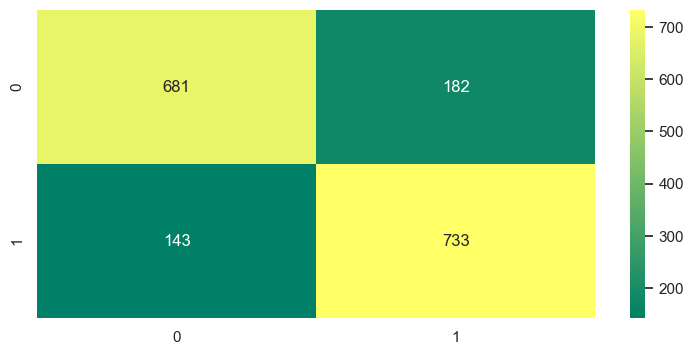

In [468]:
model_prediction1(CatBoostClassifier(verbose=False))

In [469]:
print(len(training_score))

11


In [470]:
models=['Logistic Regression','KNN','Naive Bayes','svm','Decision tree','Random fores',
       'Adaboost','GradientBoost','ligtgbm','xgboost','catbbost']

In [472]:
df=pd.DataFrame({'Algoritm':models,'Training_score':training_score,'Testing_score':testing_score})
df

,Algoritm,Training_score,Testing_score
0,Logistic Regression,77.983894,77.170788
1,KNN,83.290193,75.273145
2,Naive Bayes,73.943054,73.433007
3,svm,81.780270,79.355952
4,Decision tree,98.475697,74.238068
5,Random fores,98.475697,80.678551
6,Adaboost,79.982744,79.240943
7,GradientBoost,81.909692,79.355952
8,ligtgbm,88.481450,81.311098
9,xgboost,92.723612,80.678551


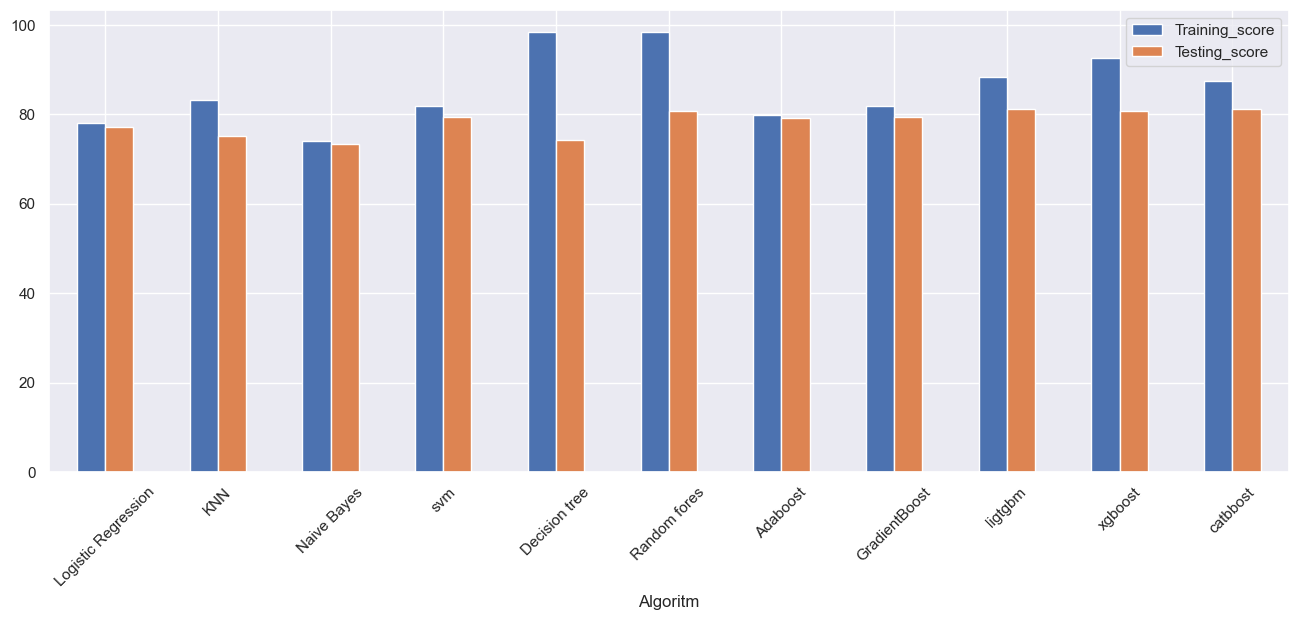

In [475]:
df.plot(x='Algoritm',y=['Training_score','Testing_score'],figsize=(16,6),kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# lgbt,xgb,radom,catboost

In [476]:
model1=LGBMClassifier()

In [483]:
parameters={'n_estimators':[100,500,600,],
            'learning_rate':[0.01,0.02,0.03,0.1],
            "random_state":[0,42],
            'num_leaves':[16,17,18]
    
}

In [484]:
from sklearn.model_selection import GridSearchCV

In [485]:
grid_search1=GridSearchCV(model1,parameters,cv=5,n_jobs=1)

In [486]:
grid_search1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.1],
                         'n_estimators': [100, 500, 600],
                         'num_leaves': [16, 17, 18], 'random_state': [0, 42]})

In [488]:
grid_search1.best_score_

0.8097500374969615

In [489]:
best_paramters1=grid_search1.best_params_
best_paramters1

{'learning_rate': 0.01,
 'n_estimators': 500,
 'num_leaves': 17,
 'random_state': 0}

In [490]:
model1=LGBMClassifier(**best_paramters1)

In [491]:
model1.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=500, num_leaves=17,
               random_state=0)

In [492]:
x_test_pred1=model1.predict(x_test)

In [ ]:
x_test_pred1=

In [494]:
accuracy_score(y_train,model1.predict(x_train))

0.8301696865113604

In [495]:
accuracy_score(y_test,x_test_pred1)

0.8021851638872916

In [517]:
model2=CatBoostClassifier()

In [502]:
parameters2={'learning_rate':[0.1,0.3,0.5,0.6,0.7],
             "random_state":[0,42],
              "depth":[8,9,10],
              "iterations":[35,40,50]
             
             
             }

In [504]:
grid_search2=GridSearchCV(model2,parameters2,cv=5,n_jobs=-1)

In [505]:
grid_search2.fit(x_train,y_train)

0:	learn: 0.5589016	total: 6.9ms	remaining: 338ms
1:	learn: 0.4993547	total: 13.6ms	remaining: 326ms
2:	learn: 0.4637978	total: 19.8ms	remaining: 310ms
3:	learn: 0.4465204	total: 27ms	remaining: 311ms
4:	learn: 0.4328724	total: 34ms	remaining: 306ms
5:	learn: 0.4226747	total: 40.3ms	remaining: 296ms
6:	learn: 0.4105064	total: 46.7ms	remaining: 287ms
7:	learn: 0.4018864	total: 53.2ms	remaining: 279ms
8:	learn: 0.3973512	total: 59.3ms	remaining: 270ms
9:	learn: 0.3915739	total: 65.7ms	remaining: 263ms
10:	learn: 0.3865414	total: 71.2ms	remaining: 253ms
11:	learn: 0.3828749	total: 76.7ms	remaining: 243ms
12:	learn: 0.3778215	total: 82.5ms	remaining: 235ms
13:	learn: 0.3740570	total: 87.6ms	remaining: 225ms
14:	learn: 0.3668859	total: 92.6ms	remaining: 216ms
15:	learn: 0.3591110	total: 99.1ms	remaining: 210ms
16:	learn: 0.3553112	total: 104ms	remaining: 202ms
17:	learn: 0.3519794	total: 110ms	remaining: 195ms
18:	learn: 0.3493955	total: 115ms	remaining: 188ms
19:	learn: 0.3445504	total: 12

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000020B30C545B0>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42]})

In [521]:
grid_search2.best_score_

0.8039983656496801

In [524]:
best_params=grid_search2.best_params_
best_params

{'depth': 8, 'iterations': 50, 'learning_rate': 0.3, 'random_state': 42}

In [525]:
model2=CatBoostClassifier(**best_params)

In [526]:
model2.fit(x_train,y_train)

0:	learn: 0.5589016	total: 9.22ms	remaining: 452ms
1:	learn: 0.4993547	total: 20.1ms	remaining: 482ms
2:	learn: 0.4637978	total: 28.3ms	remaining: 444ms
3:	learn: 0.4465204	total: 39.2ms	remaining: 451ms
4:	learn: 0.4328724	total: 48.2ms	remaining: 434ms
5:	learn: 0.4226747	total: 56.8ms	remaining: 416ms
6:	learn: 0.4105064	total: 65.2ms	remaining: 401ms
7:	learn: 0.4018864	total: 73.5ms	remaining: 386ms
8:	learn: 0.3973512	total: 81.5ms	remaining: 371ms
9:	learn: 0.3915739	total: 89.5ms	remaining: 358ms
10:	learn: 0.3865414	total: 97ms	remaining: 344ms
11:	learn: 0.3828749	total: 105ms	remaining: 332ms
12:	learn: 0.3778215	total: 113ms	remaining: 321ms
13:	learn: 0.3740570	total: 120ms	remaining: 308ms
14:	learn: 0.3668859	total: 127ms	remaining: 297ms
15:	learn: 0.3591110	total: 135ms	remaining: 287ms
16:	learn: 0.3553112	total: 142ms	remaining: 276ms
17:	learn: 0.3519794	total: 150ms	remaining: 266ms
18:	learn: 0.3493955	total: 157ms	remaining: 256ms
19:	learn: 0.3445504	total: 164m

In [527]:

x_test_pred2=model2.predict(x_test)

In [528]:
accuracy_score(y_test,x_test_pred2)

0.8113858539390454

In [529]:
model3=XGBClassifier()

In [535]:
parameters3={'n_estimators':[50,100,150],
            'random_state':[0,42],
            'learning_rate':[0.1,0.3,0.5,1.0]
    
    
    
}

In [536]:
grid_search3=GridSearchCV(model3,parameters3,cv=5,n_jobs=-1)

In [537]:
grid_search3.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42]})

In [538]:
grid_search3.best_score_

0.8081667864845434

In [540]:
best_parameters3=grid_search3.best_params_
best_parameters3

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}

In [541]:
model3=XGBClassifier(**best_parameters3)

In [542]:
model3.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [545]:
x_test_pred3=model3.predict(x_test)

In [546]:
accuracy_score(y_test,x_test_pred3)

0.8131109833237493

In [547]:
model4=RandomForestClassifier()

In [548]:
parameters4={'n_estimators':[100,200,500,700],
             'min_samples_split':[7,8,9],
             'max_depth':[10,11,12],
             'min_samples_leaf':[4,5,6]
    
    
    
}

In [550]:
grid_search4=GridSearchCV(model4,parameters4,cv=5,n_jobs=-1)

In [551]:
grid_search4.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 200, 500, 700]})

In [552]:
grid_search4.best_score_

0.8012656905388701

In [553]:
best_parameters4=grid_search4.best_params_
best_parameters4

{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 500}

In [554]:
model4=RandomForestClassifier(**best_parameters4)

In [555]:
model4.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=7,
                       n_estimators=500)

In [556]:
x_test_pred4=model4.predict(x_test)

In [557]:
accuracy_score(y_test,x_test_pred4)

0.8016101207590569

#  Stacking

In [559]:
stacking_model=StackingClassifier(estimators=[('LGBM',model1),
                              ('CAT Boost',model2),
                              ('XGBoost',model3),
                               ('RF',model4)
                              ])

In [560]:
stacking_model.fit(x_train,y_train)

0:	learn: 0.5589016	total: 8.64ms	remaining: 424ms
1:	learn: 0.4993547	total: 16.5ms	remaining: 395ms
2:	learn: 0.4637978	total: 25.2ms	remaining: 395ms
3:	learn: 0.4465204	total: 33.5ms	remaining: 385ms
4:	learn: 0.4328724	total: 41ms	remaining: 369ms
5:	learn: 0.4226747	total: 48.2ms	remaining: 353ms
6:	learn: 0.4105064	total: 55.4ms	remaining: 340ms
7:	learn: 0.4018864	total: 62.9ms	remaining: 330ms
8:	learn: 0.3973512	total: 69.4ms	remaining: 316ms
9:	learn: 0.3915739	total: 76.1ms	remaining: 304ms
10:	learn: 0.3865414	total: 82.6ms	remaining: 293ms
11:	learn: 0.3828749	total: 89.5ms	remaining: 284ms
12:	learn: 0.3778215	total: 97.4ms	remaining: 277ms
13:	learn: 0.3740570	total: 104ms	remaining: 267ms
14:	learn: 0.3668859	total: 111ms	remaining: 259ms
15:	learn: 0.3591110	total: 118ms	remaining: 251ms
16:	learn: 0.3553112	total: 125ms	remaining: 242ms
17:	learn: 0.3519794	total: 132ms	remaining: 234ms
18:	learn: 0.3493955	total: 139ms	remaining: 227ms
19:	learn: 0.3445504	total: 14

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(learning_rate=0.01,
                                               n_estimators=500, num_leaves=17,
                                               random_state=0)),
                               ('CAT Boost',
                                <catboost.core.CatBoostClassifier object at 0x0000020B399E48E0>),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_roun...
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=0, ...)),
                               ('RF',
                                RandomForestClassifier(max_depth=12,
                                                       min_samples_leaf=5,
                                                       min_samples_split=7,
                                                       n_estimators=500))])

In [561]:
x_train_pred5=stacking_model.predict(x_train)

In [562]:
x_test_pred5=stacking_model.predict(x_test)

In [564]:
accuracy_score(y_train,x_train_pred5)

0.8538970376761577

In [565]:
accuracy_score(y_test,x_test_pred5)

0.8108108108108109

# Submission

In [570]:
train_df.shape

(8693, 29)

In [569]:
test_df.shape

(4277, 29)

In [572]:
pred=stacking_model.predict(test_df.iloc[:,1:])

In [573]:
pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [575]:
pass_df['Transported']=pred

In [576]:
pass_df

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [578]:
pass_df['Transported'].replace({0:False,1:True},inplace=True)

In [579]:
pass_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [580]:
pass_df.to_csv("Spaceship_prediction_project.csv",index=False)

In [581]:
import os

In [582]:
os.getcwd()

'C:\\Users\\verma\\python'